## Observations and Insights 

#Observation 1-- The heavier the mouse, the larger the tumor (at least for the Capomulin Regimen)
#Observation 2-- Male mice took up just over half of the total timepoints collected.
#Observation 3-- For GusGus(s185), the Capomulin Regimen seemed to work since its tumor volume decreased as time went on.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
scc_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
scc_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
scc_data_complete.value_counts("Mouse ID")

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
scc_data_dup=scc_data_complete.duplicated(subset=["Mouse ID","Timepoint"])
scc_data_complete[scc_data_dup].values

array([['g989', 'Propriva', 'Female', 21, 26, 0, 45.0, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 5, 47.57039208, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 10, 49.8805278, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 15, 53.44201976, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 20, 54.65765008, 1]],
      dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

#see above array


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
scc_data_cln = scc_data_complete[scc_data_complete["Mouse ID"] != "g989"]
scc_data_cln

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
scc_data_cln.value_counts("Mouse ID")

Mouse ID
a203    10
l897    10
m546    10
m550    10
m601    10
        ..
d133     1
b447     1
u153     1
v199     1
t573     1
Length: 248, dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
scc_grpby = scc_data_cln.groupby("Drug Regimen")
scc_mn_reg = scc_grpby.mean()["Tumor Volume (mm3)"]
scc_mdn_reg = scc_grpby.median()["Tumor Volume (mm3)"]
scc_vrn_reg = scc_grpby.var()["Tumor Volume (mm3)"]
scc_stdv_reg = scc_grpby.std()["Tumor Volume (mm3)"]
scc_sem_reg = scc_grpby.sem()["Tumor Volume (mm3)"]

scc_smry = pd.DataFrame({"Mean Tumor Volume": scc_mn_reg, "Median Tumor Volume": scc_mdn_reg, "Variance of Tumor Volume": scc_vrn_reg, "Standard Dev. of Tumor Volume": scc_stdv_reg, "SEM of Tumor Volume": scc_sem_reg})
scc_smry

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Dev. of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
scc_grpby.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

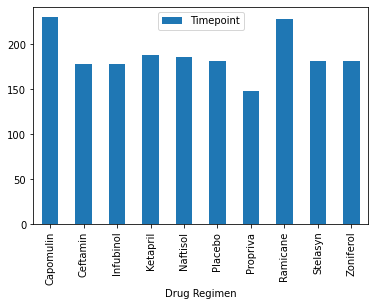

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#total number of measurements per Drug Regimen.  This is NOT asking for how many mice are in each Drug Regimen.  These are two different calculations. 
timepoints_grpby_regimen = scc_grpby[["Timepoint"]].count()
timepoints_grpby_regimen.plot.bar()

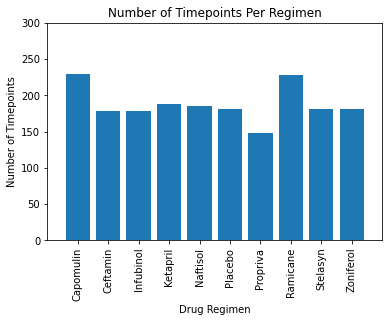

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.title("Number of Timepoints Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.xticks(ticks = range(len(timepoints_grpby_regimen.index)), labels = timepoints_grpby_regimen.index, rotation=90)
plt.xlim(-1, 10)
plt.ylim(0, 300)

plt.bar(timepoints_grpby_regimen.index, timepoints_grpby_regimen["Timepoint"])
plt.show()


<AxesSubplot:title={'center':'Percent of Timepoints Collected per Sex'}, ylabel='Timepoint'>

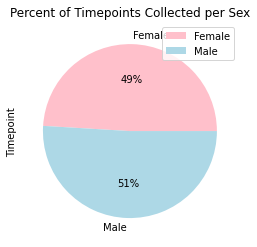

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#the total number of measurements collected by male/female.
timepoints_grpby_sex = scc_data_cln.groupby("Sex")[["Timepoint"]].count()
timepoints_grpby_sex.plot(kind='pie', y='Timepoint', autopct='%1.0f%%',
                                colors = ['pink', 'lightblue'],
                                title='Percent of Timepoints Collected per Sex')

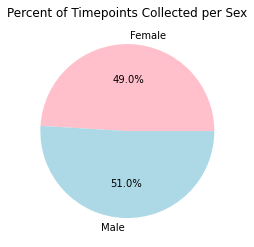

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(timepoints_grpby_sex["Timepoint"], labels=timepoints_grpby_sex.index, colors=['pink', 'lightblue'], autopct="%1.1f%%")
plt.title("Percent of Timepoints Collected per Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tp = scc_data_cln.groupby("Mouse ID")["Timepoint"].max()
final_tp = pd.DataFrame(final_tp)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tv_df = pd.merge(final_tp, scc_data_cln, how="left", on=["Mouse ID", "Timepoint"])
final_tv_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
select_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #First, make outlier function with tumor volume data, then use this to get IQR/bounds stats.
def outlier_func(regimen, upbound, lobound):
    outliers = []
    for ID, TV in regimen[["Mouse ID", "Tumor Volume (mm3)"]].iterrows(): #iterrows gets ID/TV as pair (index and series value) (subset)
            tvalue = TV["Tumor Volume (mm3)"]
            if(tvalue > upbound or tvalue < lobound):
                outliers.append(TV["Mouse ID"])
    return outliers
    
def regimen_iqr(regimen_name):
    regimen = final_tv_df[final_tv_df["Drug Regimen"] == regimen_name]
    
    quartiles = regimen["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    low_q = quartiles[0.25]
    up_q = quartiles[0.75]
    iqr = up_q-low_q
    lobound = low_q - (1.5*iqr)
    upbound = up_q + (1.5*iqr)
    outliers = outlier_func(regimen, upbound, lobound)

    print(f"The regimen {regimen_name} has a lower quartile of {low_q}, an upper quartile of {up_q} and an IQR of {iqr}. Possible outliers are tumor volumes below {lobound} or above {upbound}.")
    
    if(not outliers):
        print("This regimen has no outliers.")
    else:
        print(f"Mouse {', '.join(outliers)} is a possible outlier for this regimen.")
        
for regimen in select_regimens:
    print(regimen_iqr(regimen))

The regimen Capomulin has a lower quartile of 32.37735684, an upper quartile of 40.1592203 and an IQR of 7.781863460000004. Possible outliers are tumor volumes below 20.70456164999999 or above 51.83201549.
This regimen has no outliers.
None
The regimen Ramicane has a lower quartile of 31.56046955, an upper quartile of 40.65900627 and an IQR of 9.098536719999998. Possible outliers are tumor volumes below 17.912664470000003 or above 54.30681135.
This regimen has no outliers.
None
The regimen Infubinol has a lower quartile of 54.04860769, an upper quartile of 65.52574285 and an IQR of 11.477135160000003. Possible outliers are tumor volumes below 36.83290494999999 or above 82.74144559000001.
Mouse c326 is a possible outlier for this regimen.
None
The regimen Ceftamin has a lower quartile of 48.72207785, an upper quartile of 64.29983003 and an IQR of 15.577752179999997. Possible outliers are tumor volumes below 25.355449580000002 or above 87.66645829999999.
This regimen has no outliers.
Non

C:\Users\GMyer\AppData\Local\Temp\ipykernel_73520\2605453473.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(big_box_df.keys())


{'whiskers': [<matplotlib.lines.Line2D at 0x2689c9c65b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2689c9c26d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2689c9c6e80>,
 'medians': [<matplotlib.lines.Line2D at 0x2689c9d2190>,
 'fliers': [<matplotlib.lines.Line2D at 0x2689c9d2460>,
 'means': []}

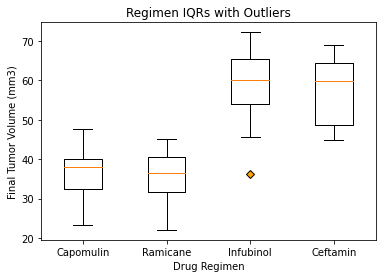

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
big_box = []
big_box_df = {}
for regimen in select_regimens:
    big_box.append(final_tv_df[final_tv_df["Drug Regimen"] == regimen]["Tumor Volume (mm3)"])
    big_box_df[regimen] = final_tv_df[final_tv_df["Drug Regimen"] == regimen]
#make outlier look special
outlier = dict(markerfacecolor='orange', marker='D')
fig3, ax = plt.subplots()
ax.set_title('Regimen IQRs with Outliers')
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xticklabels(big_box_df.keys())
ax.boxplot(big_box, flierprops= outlier)


## Line and Scatter Plots

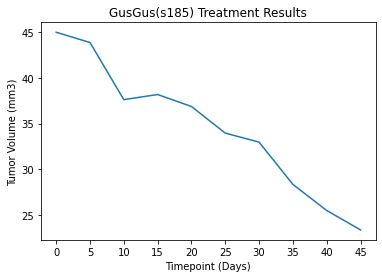

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mice = scc_data_cln.loc[scc_data_cln["Drug Regimen"] == "Capomulin"]
#cap_mice.head(), chose Mouse ID "s185", get data for GusGus s185
gusgus = scc_data_cln.loc[scc_data_cln["Mouse ID"] == "s185"]
gusgus_time = gusgus["Timepoint"].values
gusgus_vol = gusgus["Tumor Volume (mm3)"].values
#plot him
plt.figure()
plt.plot(gusgus_time,gusgus_vol)

plt.xticks(gusgus_time)
plt.title("GusGus(s185) Treatment Results")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

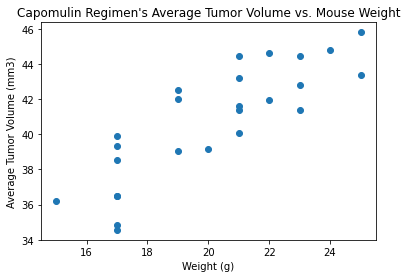

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# average!
avg_tv_cap = cap_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_wt_cap = cap_mice.groupby("Mouse ID")["Weight (g)"].mean()
#plot tv vs. wt
plt.figure()
plt.scatter(avg_wt_cap,avg_tv_cap)
plt.title("Capomulin Regimen's Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Capomulin's correlation coefficient for average mouse weight vs tumor volume is: 0.84


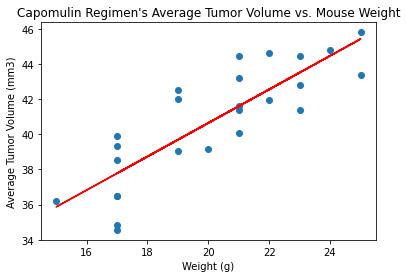

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# spearman correlation
print(f"Capomulin's correlation coefficient for average mouse weight vs tumor volume is: {round(st.pearsonr(avg_wt_cap,avg_tv_cap)[0],2)}")
# plot same as above but add regression line
from scipy import stats
plt.figure()
plt.scatter(avg_wt_cap,avg_tv_cap)

cap_slope, cap_int, cap_r, cap_p, cap_std_err = stats.linregress(avg_wt_cap, avg_tv_cap)
#y=mx+b
cap_fit = cap_slope * avg_wt_cap + cap_int
plt.plot(avg_wt_cap,cap_fit,"r-")
plt.title("Capomulin Regimen's Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()